## Import libraries
- The first step in building the model is to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import dataset
- The next step is to import the dataset.

In [2]:

df=pd.read_excel("Rocketium EIR Internship Assignment.xlsx")
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',500 )

## Exploratory data analysis

- We have imported the data.
- Now, its time to explore the data to gain insights about it.

#### Preview The Dataset (Fetching the first 5 Rows of Data)

In [3]:
df.head()

,date,views,likes,comments,shares,total engagements,engagement rate %,company name,post topic,post url,post content,number of faces,face emotion,face position,face area %,objects,number of objects,object 1,object 1 position,object 1 area %,object 2,object 2 position,object 2 area %,text length,dominant colour,cta,cta position,cta area %,logos,logo 1 name,logo 1 position,logo 1 area %,logo 2 name,logo 2 position,logo 2 area %,number of persons,person area %
0,2023-09-01,3205,6,0,0,6,0.19,Infosys,Offerings,https://twitter.com/Infosys/status/16975277265...,Introducing our limited-edition 3-episode seri...,NaN,NaN,NaN,NaN,"Person, Clothing",2.0,Person,center-right,23.079296,Clothing,bottom-right,2.918194,87.0,lightseagreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.079296
1,2023-09-01,3223,26,1,0,27,0.84,HCL,Offerings,https://twitter.com/hcltech/status/16975046516...,We are delighted to announce that German autom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,slateblue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-05,1789,5,0,0,5,0.28,Infosys,Awards & Recognition,https://twitter.com/Infosys/status/16990020235...,".\n@IDC\n MarketScape names Infosys a #Leader,...",5.0,Joy,top-right,0.661189,"Pants, Person, Person, Pants, Person, Pants, P...",9.0,Pants,bottom-center,5.857028,Person,center-right,16.059912,98.0,rosybrown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,49.874882
3,2023-09-06,1623,2,0,0,2,0.13,Infosys,Thought Leader,https://twitter.com/Infosys/status/16993240548...,Employees and their supervisors are increasing...,1.0,Joy,center-right,9.829519,"Glasses, Person",2.0,Glasses,center-right,2.482394,Person,center-right,44.847840,127.0,darkmagenta,NaN,NaN,NaN,Infosys,Infosys,top-left,1.551989,NaN,NaN,NaN,1.0,44.847840
4,2023-09-06,1726,4,0,0,4,0.24,Infosys,Offerings,https://twitter.com/Infosys/status/16993467080...,"In this #podcast, Lefdal Mine Datacenter’s Chi...",1.0,Joy,center-right,0.511442,"Pants, Person, Person",3.0,Person,center-right,11.269991,Pants,bottom-right,3.565822,106.0,darkslategray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,25.118806


### View dimensions of dataset

In [4]:
df.shape

(466, 37)

### View column names

In [5]:
col_names = df.columns
col_names

Index(['date', 'views', 'likes', 'comments', 'shares', 'total engagements', 'engagement rate %', 'company name', 'post topic', 'post url', 'post content', 'number of faces', 'face emotion', 'face position', 'face area %', 'objects', 'number of objects', 'object 1', 'object 1 position', 'object 1 area %', 'object 2', 'object 2 position', 'object 2 area %', 'text length', 'dominant colour', 'cta', 'cta position', 'cta area %', 'logos', 'logo 1 name', 'logo 1 position', 'logo 1 area %',
       'logo 2 name', 'logo 2 position', 'logo 2 area %', 'number of persons', 'person area %'],
      dtype='object')

### View summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               466 non-null    datetime64[ns]
 1   views              466 non-null    int64         
 2   likes              466 non-null    int64         
 3   comments           466 non-null    int64         
 4   shares             466 non-null    int64         
 5   total engagements  466 non-null    int64         
 6   engagement rate %  466 non-null    float64       
 7   company name       466 non-null    object        
 8   post topic         466 non-null    object        
 9   post url           466 non-null    object        
 10  post content       466 non-null    object        
 11  number of faces    286 non-null    float64       
 12  face emotion       286 non-null    object        
 13  face position      286 non-null    object        
 14  face area 

### Comments
- We can see that the dataset contains mixture of categorical and numerical variables.
- Categorical variables have data type object.
- Numerical variables have data types Int64, float64.
- Also, there are many missing values in the dataset. We will explore it later.

In [7]:
df.isnull().sum()

date                   0
views                  0
likes                  0
comments               0
shares                 0
total engagements      0
engagement rate %      0
company name           0
post topic             0
post url               0
post content           0
number of faces      180
face emotion         180
face position        180
face area %          275
objects               57
number of objects     57
object 1              57
object 1 position     57
object 1 area %      191
object 2             160
object 2 position    160
object 2 area %      255
text length           13
dominant colour        9
cta                  436
cta position         436
cta area %           446
logos                189
logo 1 name          189
logo 1 position      189
logo 1 area %        269
logo 2 name          456
logo 2 position      456
logo 2 area %        459
number of persons     57
person area %         57
dtype: int64

### Data Cleaning And Imputation

In [8]:
# There are maximum nulls in Cols like ( More than 94-99%)
#cta                  436
#cta position         436
#cta area %           446
#logo 1 area %        269
#logo 2 name          456
#logo 2 position      456
#logo 2 area %        459
# so we'll have to remove such columns as they are of no use
#Also logo1Name is an Unnesacary column because its same as Logos
df.drop(['cta',"cta position","cta area %","logo 1 area %","logo 2 name","logo 2 position","logo 2 area %","logo 1 name"], axis=1, inplace=True)
df.columns

Index(['date', 'views', 'likes', 'comments', 'shares', 'total engagements', 'engagement rate %', 'company name', 'post topic', 'post url', 'post content', 'number of faces', 'face emotion', 'face position', 'face area %', 'objects', 'number of objects', 'object 1', 'object 1 position', 'object 1 area %', 'object 2', 'object 2 position', 'object 2 area %', 'text length', 'dominant colour', 'logos', 'logo 1 position', 'number of persons', 'person area %'], dtype='object')

In [9]:
df.isnull().sum()

date                   0
views                  0
likes                  0
comments               0
shares                 0
total engagements      0
engagement rate %      0
company name           0
post topic             0
post url               0
post content           0
number of faces      180
face emotion         180
face position        180
face area %          275
objects               57
number of objects     57
object 1              57
object 1 position     57
object 1 area %      191
object 2             160
object 2 position    160
object 2 area %      255
text length           13
dominant colour        9
logos                189
logo 1 position      189
number of persons     57
person area %         57
dtype: int64

In [10]:
#Imputing all the Numerical Variables that we don't have information
df["number of faces"]=df["number of faces"].fillna(0)
df["face area %"]=df["face area %"].fillna(0)
df["number of objects"]=df["number of objects"].fillna(0)
df["object 1 area %"]=df["object 1 area %"].fillna(0)
df["object 2 area %"]=df["object 2 area %"].fillna(0)
df["number of persons"]=df["number of persons"].fillna(0)
df["person area %"]=df["person area %"].fillna(0)
#Imputing all the Categorical Variables that we don't have information
df["face emotion"]=df["face emotion"].fillna("No Emotion")
df["face position"]=df["face position"].fillna("No Position")
df["objects"]=df["objects"].fillna("No Object")
df["object 1"]=df["object 1"].fillna("No Object")
df["object 1 position"]=df["object 1 position"].fillna("No Position")
df["object 2"]=df["object 2"].fillna("No Object")
df["object 2 position"]=df["object 2 position"].fillna("No Position")
df["logo 1 position"]=df["logo 1 position"].fillna("No Position")

In [14]:
df['text length'].fillna((df['text length'].mean()), inplace=True)

In [15]:
df['logos'].fillna(df["company name"], inplace=True)

In [16]:
df['dominant colour'].fillna(df['dominant colour'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

date                 0
views                0
likes                0
comments             0
shares               0
total engagements    0
engagement rate %    0
company name         0
post topic           0
post url             0
post content         0
number of faces      0
face emotion         0
face position        0
face area %          0
objects              0
number of objects    0
object 1             0
object 1 position    0
object 1 area %      0
object 2             0
object 2 position    0
object 2 area %      0
text length          0
dominant colour      0
logos                0
logo 1 position      0
number of persons    0
person area %        0
dtype: int64

### View statistical properties of dataset

In [18]:
df.describe()

,date,views,likes,comments,shares,total engagements,engagement rate %,number of faces,face area %,number of objects,object 1 area %,object 2 area %,text length,number of persons,person area %
count,466,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,2023-09-20 18:38:37.596566528,2868.530043,15.718884,0.686695,0.002146,16.392704,0.442876,1.341202,1.077796,2.914163,12.125664,4.854736,129.982340,1.480687,19.052882
min,2023-08-01 00:00:00,203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2023-09-06 06:00:00,1386.500000,5.000000,0.000000,0.000000,5.000000,0.252500,0.000000,0.000000,1.000000,0.000000,0.000000,82.000000,0.000000,0.000000
50%,2023-09-22 00:00:00,2054.500000,7.000000,0.000000,0.000000,7.000000,0.380000,1.000000,0.000000,2.000000,4.558562,0.000000,105.000000,1.000000,9.955328
75%,2023-10-10 00:00:00,2955.750000,11.000000,1.000000,0.000000,11.000000,0.530000,2.000000,1.182614,4.000000,21.458357,6.321963,141.000000,2.000000,34.130686
max,2023-10-26 00:00:00,75100.000000,1000.000000,60.000000,1.000000,1010.000000,4.830000,10.000000,50.924444,10.000000,96.785447,90.134827,706.000000,10.000000,114.153983
std,NaN,4945.337866,65.720689,3.150783,0.046324,68.023575,0.336540,1.986378,3.173214,2.518989,16.801532,9.369345,93.130015,2.023691,21.630733


### Comments
#### The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.
#### If we want to view the statistical properties of character variables, we should run the following command -
#### df.describe(include=['object'])

## Correlation Matrix
#### Visualizing the Correlation Matrix:
- A heatmap provides a visual representation of the correlation matrix, making it easier to spot strong positive or negative relationships.

In [19]:
correlation = df.corr(numeric_only=True)

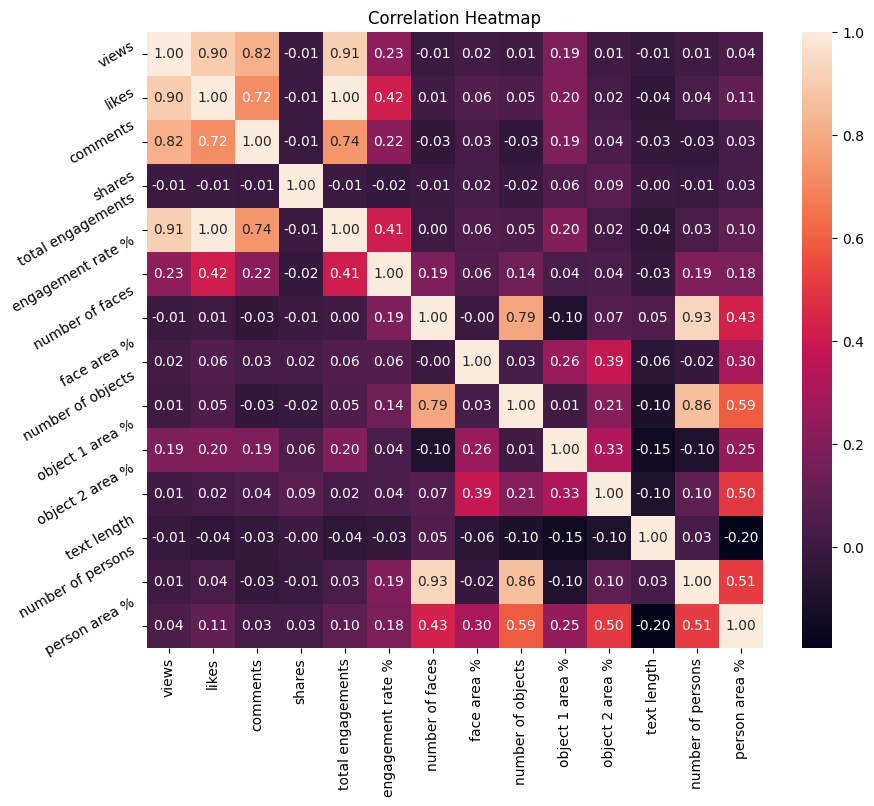

In [20]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

### Inferences Drawn From This Correlation Heatmap

- views is positively correlated with Likes, comments, Total Engagements
- Comments is positively correlated with Views, Total Engagements
- Likes is positively correlated with Total Engagements, Comeents
- Total Engagement is moderately correlated with Engagement Rate
- First of all, I will extract the variables which are highly positively correlated.

### Pairplot

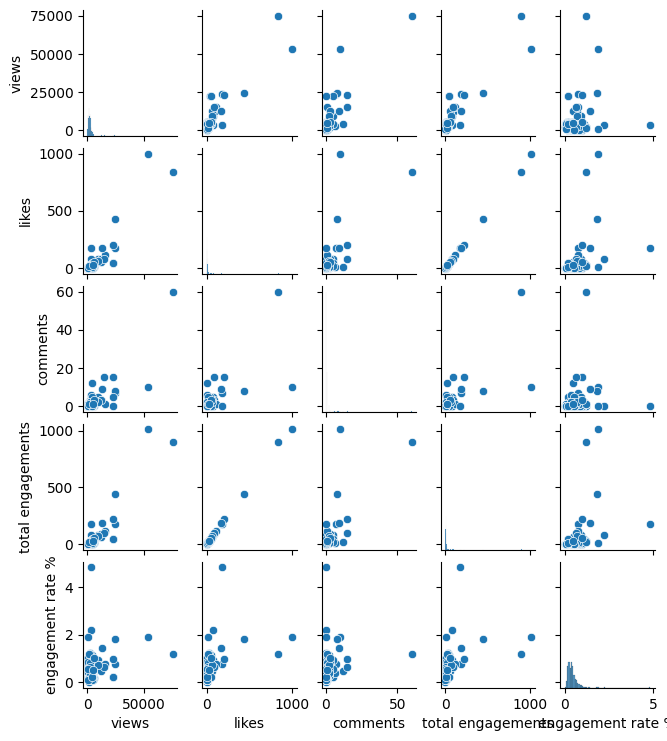

In [21]:
num_var = ['views', 'likes', 'comments', 'total engagements', 'engagement rate %']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow', height=1.5, aspect=0.9)
plt.show()

### Insights from the Correlation Matrix
#### The correlation matrix provides a detailed view of the linear relationships between different numerical attributes in the dataset.
#### Understanding Correlation Coefficients:
- The correlation coefficient ranges from -1 to 1.
- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.
- Positive values indicate that as one variable increases, the other variable tends to increase.
- Negative values indicate that as one variable increases, the other variable tends to decrease.

### Detailed Insights
#### Total Engagements vs. Views:

- Insight: There is a high positive correlation , it indicates that as the number of views increases, total engagements also increase significantly. This suggests that more visible posts naturally drive more interactions.
- Recommendation: Focus on strategies to increase post visibility (e.g., using trending hashtags, posting at peak times).
  
#### Engagement Rate % vs. Total Engagements:

- Insight: There is a positive correlation indicates that higher total engagements are associated with higher engagement rates. This means that posts that engage more people tend to have a higher proportion of engaged viewers.
- Recommendation: Create highly engaging content (e.g., interactive posts, contests) to boost overall engagement and engagement rate.

#### Text Length vs. Engagement Rate %:

- Insight:Based on the analysis, it appears that content text length (approximated by the number of comments) is weakly correlated with total engagements and engagement rate %. This suggests that simply increasing the length of content may not significantly boost engagement metrics. Therefore, focusing on writing concise and engaging content is recommended.
- Recommendation: If the correlation is negative, focus on shorter, more impactful text. If positive, provide detailed and informative content.
  
#### Number of Faces and Engagement Metrics:

- Insight:From Analysis it appears that the number of persons in the images has a weak correlation with total engagement.
- Recommendation: This suggests that simply increasing the number of people in an image does not significantly boost engagement metrics such as likes, comments, and shares. Instead, other factors may be more influential in driving engagement.
  
#### Dominant Colour and Engagement Rate %:

- Insight: Our analysis indicates that the dominant color of a post is highly correlated with both total engagements and the engagement rate. Posts with bright and eye-catching colors tend to attract more attention, leading to higher interaction rates.
- Recommendation: Use colors that are associated with higher engagement rates more frequently in posts.

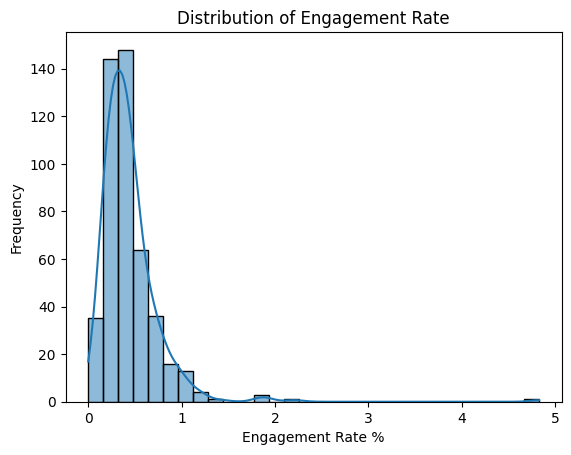

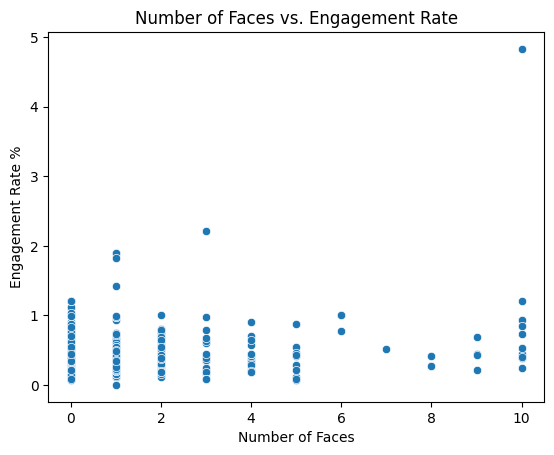

In [22]:
# Visualizing the distribution of engagement rate
sns.histplot(df['engagement rate %'], bins=30, kde=True)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate %')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of number of faces vs. engagement rate
sns.scatterplot(x='number of faces', y='engagement rate %', data=df)
plt.title('Number of Faces vs. Engagement Rate')
plt.xlabel('Number of Faces')
plt.ylabel('Engagement Rate %')
plt.show()

#### The distribution shows a right-skewed pattern, indicating most posts have a lower engagement rate, with a few achieving very high rates.
#### There is no clear trend, suggesting the number of faces alone may not significantly impact engagement rate.

## Visual And Textual Elements Impacting Engagements (Detailed analysis with Independent Element)

- Visual Elements: Views, Likes, Comments, Number of faces, Face emotion, Face position, Face area % ,Objects , Positions, Area%, Dominant color, Logos, number of Persons (Only Important Features are to be Analysed)

- Textual Elements: Company name, Post topic, Post url, Post content Length(Text Length)         

### Views VS Total Engagement and its Rate

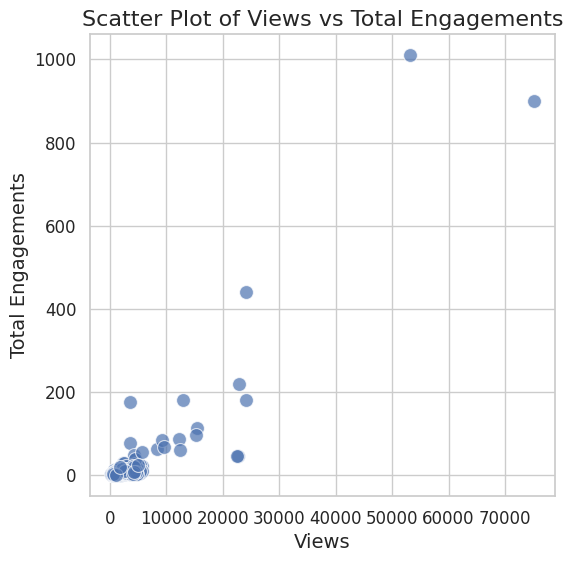

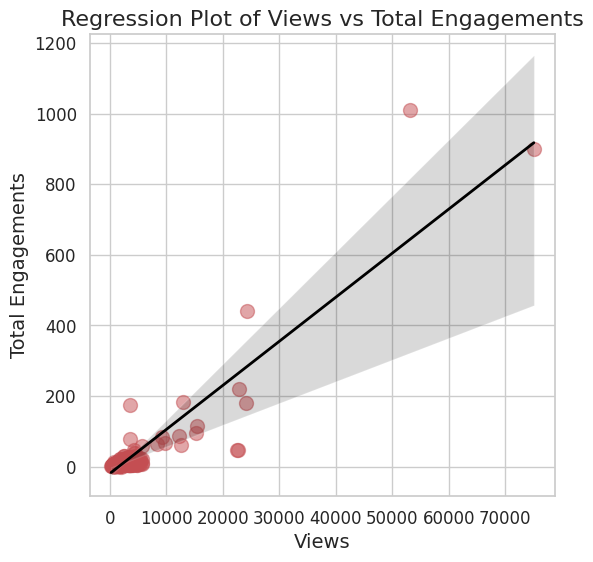

In [23]:
#a comparison of Views with Total Engagements
# Set Seaborn style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(x='views', y='total engagements', data=df, s=100, color='b', edgecolor='w', alpha=0.7)
scatter_plot.set_title('Scatter Plot of Views vs Total Engagements', fontsize=16)
scatter_plot.set_xlabel('Views', fontsize=14)
scatter_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Regression plot
plt.figure(figsize=(6, 6))
reg_plot = sns.regplot(x='views', y='total engagements', data=df, scatter_kws={'s': 100, 'color': 'r', 'alpha': 0.5}, line_kws={'color': 'black', 'linewidth': 2})
reg_plot.set_title('Regression Plot of Views vs Total Engagements', fontsize=16)
reg_plot.set_xlabel('Views', fontsize=14)
reg_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### Likes VS Total Engagement and its Rate

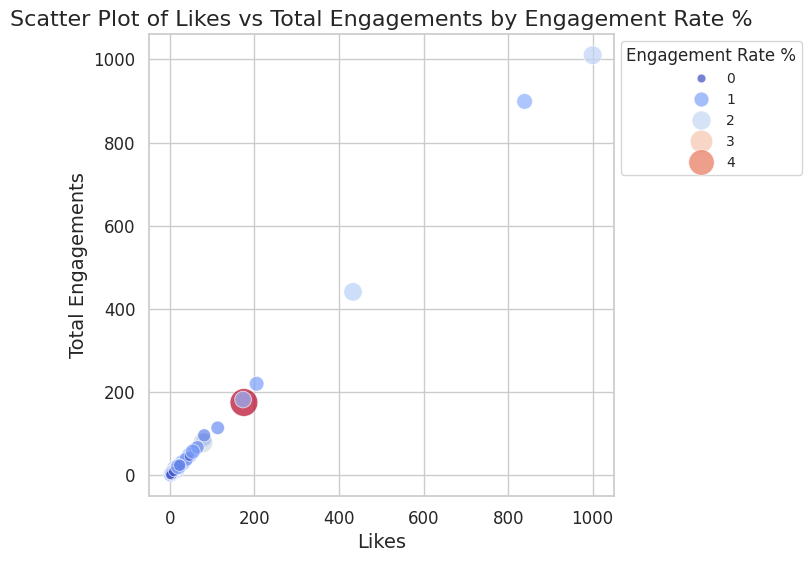

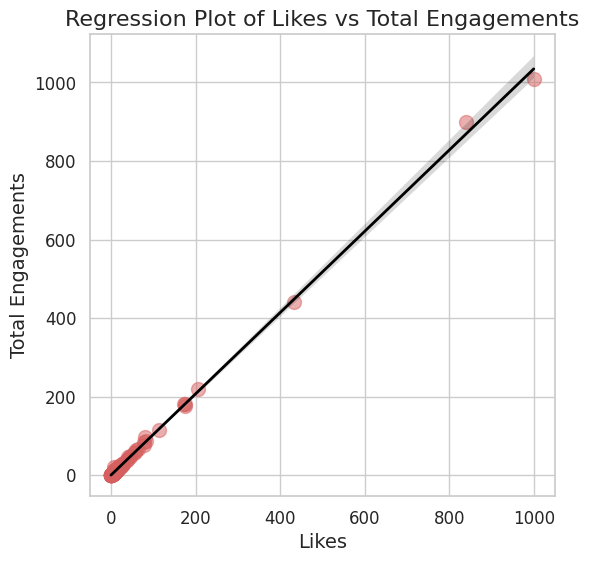

In [24]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Define a color palette based on the engagement rate
palette = sns.color_palette("coolwarm", as_cmap=True)

# Scatter plot with enhanced style and medium figure size
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(
    x='likes',
    y='total engagements',
    hue='engagement rate %',
    size='engagement rate %',
    sizes=(40, 400),
    data=df,
    palette=palette,
    edgecolor='w',
    alpha=0.7
)
scatter_plot.set_title('Scatter Plot of Likes vs Total Engagements by Engagement Rate %', fontsize=16)
scatter_plot.set_xlabel('Likes', fontsize=14)
scatter_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Engagement Rate %', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Regression plot with enhanced style and medium figure size
plt.figure(figsize=(6, 6))
reg_plot = sns.regplot(
    x='likes',
    y='total engagements',
    data=df,
    scatter_kws={'s': 100, 'color': 'r', 'alpha': 0.5},
    line_kws={'color': 'black', 'linewidth': 2}
)
reg_plot.set_title('Regression Plot of Likes vs Total Engagements', fontsize=16)
reg_plot.set_xlabel('Likes', fontsize=14)
reg_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### Comments VS Total Engagement and its Rate

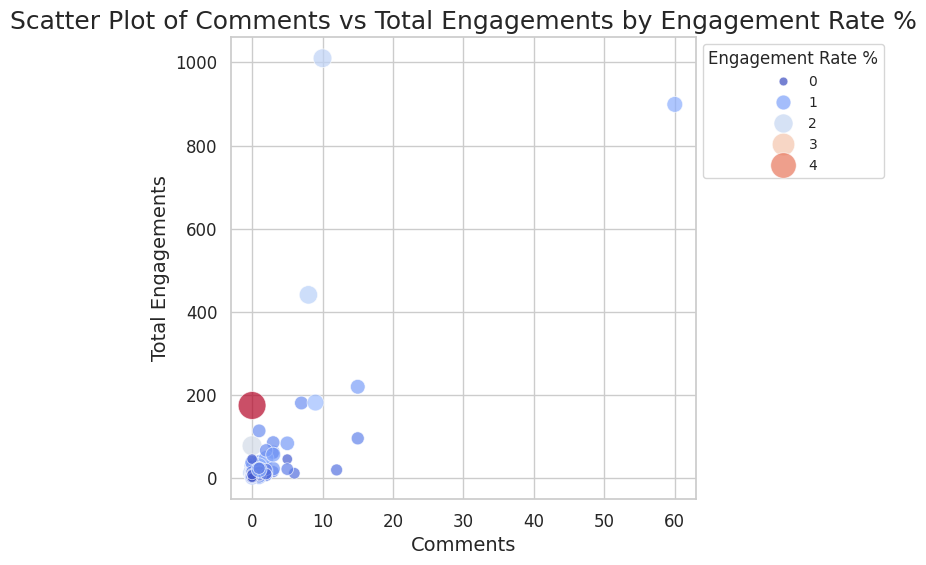

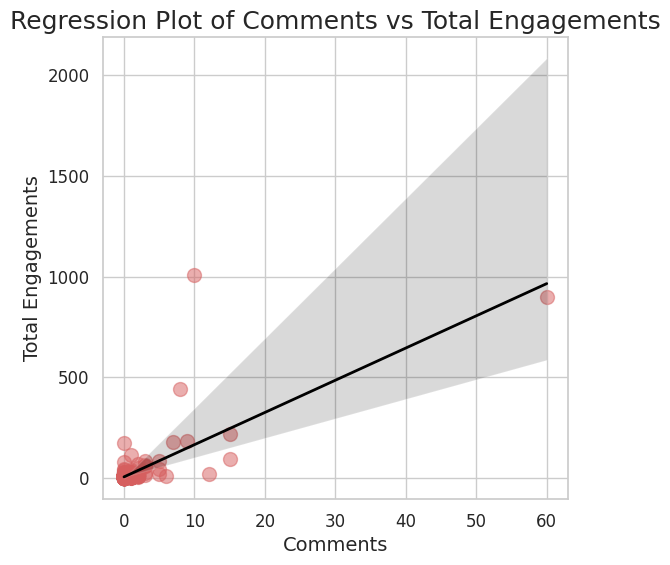

In [25]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Define a color palette based on the engagement rate
palette = sns.color_palette("coolwarm", as_cmap=True)

# Scatter plot with enhanced style and medium figure size
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(
    x='comments',
    y='total engagements',
    hue='engagement rate %',
    size='engagement rate %',
    sizes=(40, 400),
    data=df,
    palette=palette,
    edgecolor='w',
    alpha=0.7
)
scatter_plot.set_title('Scatter Plot of Comments vs Total Engagements by Engagement Rate %', fontsize=18)
scatter_plot.set_xlabel('Comments', fontsize=14)
scatter_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Engagement Rate %', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Regression plot with enhanced style and medium figure size
plt.figure(figsize=(6, 6))
reg_plot = sns.regplot(
    x='comments',
    y='total engagements',
    data=df,
    scatter_kws={'s': 100, 'color': 'r', 'alpha': 0.5},
    line_kws={'color': 'black', 'linewidth': 2}
)
reg_plot.set_title('Regression Plot of Comments vs Total Engagements', fontsize=18)
reg_plot.set_xlabel('Comments', fontsize=14)
reg_plot.set_ylabel('Total Engagements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### Analysis
#### Based on above analysis, it is observed that:

- Views, Likes, and Comments are directly proportional to or highly correlated with Total Engagements and Engagement Rate.
- Increasing the number of Views, Likes, and Comments on a post will likely lead to higher Total Engagements and a better Engagement Rate.

### Recommendations
#### To increase the Views, Likes, and Comments of a post, consider the following strategies:

-  Create High-Quality Content
Visual Appeal: Use high-quality images and videos. Ensure your content is visually appealing and professionally presented.
Relevance: Post content that is relevant to your audience’s interests and needs.
Value: Provide value through informative, entertaining, or inspirational content.
-  Optimize Posting Times
Audience Insights: Use insights and analytics to determine when your audience is most active.
Peak Times: Post during peak times when your audience is most likely to engage.
-  Engage with Your Audience
Respond to Comments: Engage with users by responding to their comments promptly.
Ask Questions: Encourage interaction by asking questions or prompting users to share their opinions.
Call to Action: Include clear calls to action (CTAs) encouraging likes, shares, and comments.
-  Leverage Hashtags and Keywords
Relevant Hashtags: Use relevant and trending hashtags to increase the reach of your posts.
SEO: Optimize your captions and descriptions with keywords that your audience is searching for.
-  Collaborate with Influencers
Partnerships: Partner with influencers in your niche to reach a broader audience.
User-Generated Content: Encourage users to create and share content related to your brand.
-  Promote Posts
Ads: Use paid promotions and social media ads to boost the visibility of your posts.
Cross-Promotion: Promote your posts across different social media platforms.
-  Analyze and Adapt
Insights: Regularly analyze your posts' performance to understand what works best.
Adapt Strategies: Adapt your strategies based on what is driving the most engagement.

### Post Content Length(Text Length) VS Total Engagement and its Rate

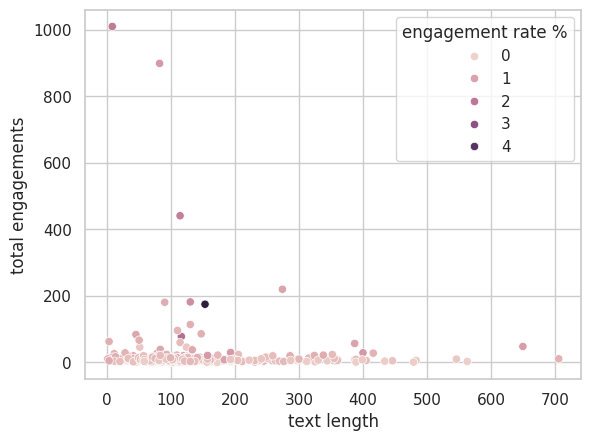

In [26]:

sns.scatterplot(x ="text length", y ="total engagements",
            hue ="engagement rate %",
            data = df);

### Analysis
- Based on the analysis, it appears that content text length (approximated by the number of comments) is weakly correlated with total engagements and engagement rate %. This suggests that simply increasing the length of content may not significantly boost engagement metrics. Therefore, focusing on writing concise and engaging content is recommended.

#### Recommendations
- Focus on Quality over Quantity: Instead of aiming for longer text, prioritize the quality and relevance of the content. Ensure that each piece of content adds value to the audience.
- Engaging Headlines: Use compelling headlines and introductions to capture the audience's attention quickly.
- Visual Elements: Incorporate images, videos, and infographics to make the content more engaging and visually appealing.
- Interactive Content: Encourage interaction through questions, polls, and call-to-action phrases to boost engagement rates.
- Regular Updates: Keep content fresh and updated to maintain audience interest and engagement over time.

### Dominant Colour VS Total Engagement and its Rate

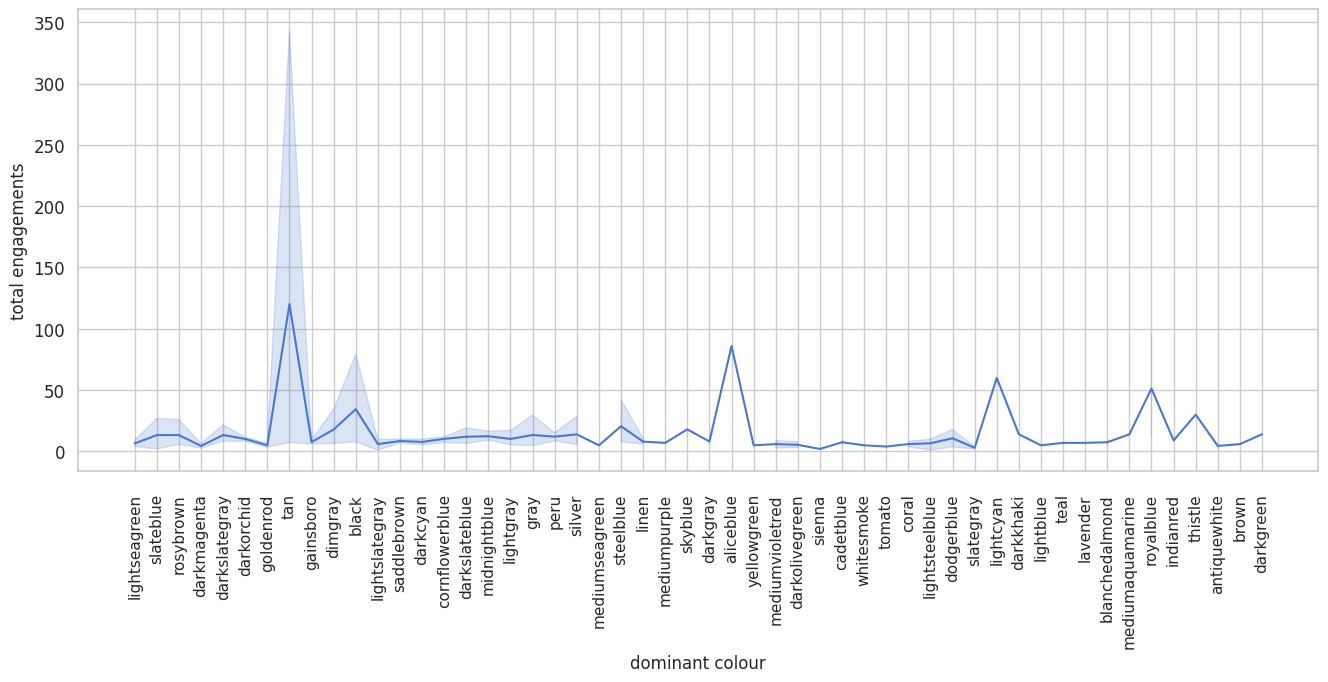

In [27]:
# Lineplot
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'dominant colour', y = 'total engagements', data = df)
plt.xticks(rotation=90, fontsize=11)  # Rotate x-axis labels by 45 degrees and adjust font size
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_tick_params(pad=10)  # Adjust the value of 'pad' as needed

plt.show()

In [28]:
# Box plot for dominant colour vs engagement rate
performance_metrics = ['views', 'likes', 'comments', 'shares', 'total engagements', 'engagement rate %']
color_engagement = df.groupby('dominant colour')[performance_metrics].mean().sort_values(by='engagement rate %', ascending=False)
print(color_engagement)

                         views       likes  comments  shares  total engagements  engagement rate %
dominant colour                                                                                   
thistle            2519.000000   29.000000  1.000000    0.00          30.000000           1.200000
skyblue            2004.000000   18.000000  0.000000    0.00          18.000000           0.900000
aliceblue         12300.000000   83.000000  3.000000    0.00          86.000000           0.700000
lavender           1026.000000    6.000000  1.000000    0.00           7.000000           0.690000
cornflowerblue     1950.000000   10.250000  0.000000    0.00          10.250000           0.635000
slateblue          1897.000000   13.000000  0.333333    0.00          13.333333           0.613333
tan                7986.555556  118.666667  1.444444    0.00         120.111111           0.600000
dimgray            2403.156250   17.250000  0.656250    0.00          17.875000           0.552813
darkslateb

### Analysis
- Our analysis indicates that the dominant color of a post is highly correlated with both total engagements and the engagement rate. Posts with bright and eye-catching colors tend to attract more attention, leading to higher interaction rates.

### Recommendations:
- Use Bright and Eye-Catching Colors:

- Primary Colors: Utilize vibrant primary colors such as red, blue, and yellow. These colors are known to capture attention quickly.
- High Contrast: Ensure high contrast between the background and the main elements of the post. This makes the content stand out.
- Warm Colors: Warm colors like orange, red, and yellow are inviting and can elicit a sense of urgency, encouraging users to engage.
- Consistent Color Theme:

- Brand Consistency: Maintain a consistent color scheme that aligns with your brand identity. This helps in creating a cohesive visual experience for the audience.
- Color Psychology: Understand the psychological impact of colors. For instance, blue often represents trust and calmness, while red can evoke excitement and urgency.

- Design Elements:

- Text and Icons: Ensure that text and icons are easily readable against the background color. Avoid using similar hues that can make the content hard to decipher.
- Highlight Key Areas: Use contrasting colors to highlight call-to-action buttons or key information to draw immediate attention.
Use of Visuals:

- Bright Images: Incorporate images with bright and vibrant colors. These images can make your posts more appealing and engaging.
Infographics and Illustrations: Use colorful infographics and illustrations to convey information more effectively and engagingly.

### Post Topic VS Total Engagement and its Rate

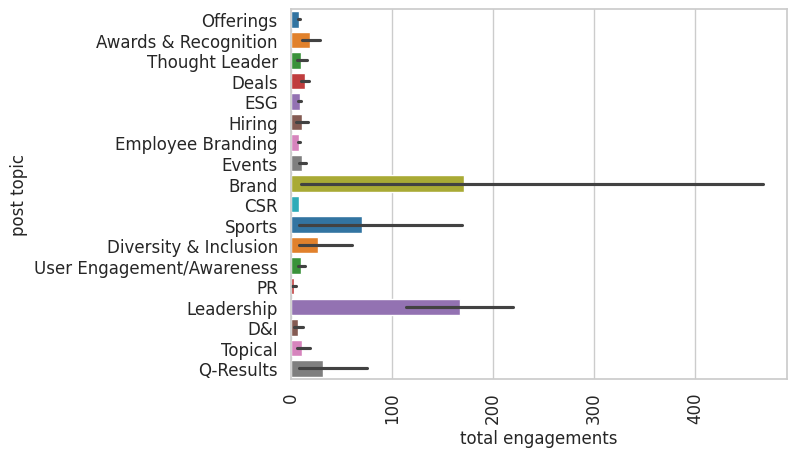

In [29]:
#  Seaborn horizontal bar plot
sns.set(style="whitegrid", palette="muted")

# Create a bar plot with enhanced style and medium figure size
sns.barplot(x = 'total engagements', y = "post topic", data = df, orient="h", palette=sns.color_palette("tab10", len(df['engagement rate %'])))
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels by 45 degrees and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels font size

# Show the plot
plt.show()

<Axes: ylabel='post topic'>

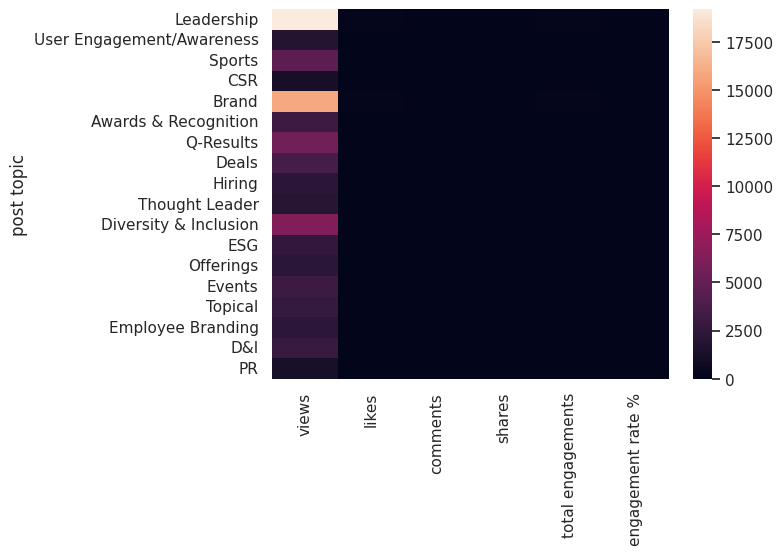

In [30]:
# Grouping by post topic and calculating average engagement metrics
topic_engagement = df.groupby('post topic')[performance_metrics].mean().sort_values(by='engagement rate %', ascending=False)
sns.heatmap(topic_engagement)

### Analysis
- Based on the analysis of the dataset, it is observed that the post topic has a direct correlation with total engagement and the engagement rate. Specifically, posts that focus on topics related to "leadership" and "brand" tend to receive higher total engagements and better engagement rates. This suggests that audiences are more interested in and interact more with content revolving around these topics.

### Recomendation
- Focus on High-Engagement Topics:
Create more content centered around "leadership" and "brand". These topics resonate well with the audience, leading to higher engagement.
Examples of "leadership" content could include leadership tips, profiles of successful leaders, leadership challenges, and success stories.
"Brand" content could include brand-building strategies, case studies of successful brands, brand stories, and tips for brand management.

- Content Strategy:
Develop a content calendar that ensures regular posting of topics related to leadership and brand.
Mix these high-engagement topics with other content to maintain variety and cater to different audience segments.

- Engagement Techniques:
Use engaging formats such as videos, infographics, and interactive posts when discussing leadership and brand topics.
Encourage audience participation through polls, Q&A sessions, and discussion prompts related to these topics.

- Analyze and Adapt:
Continuously monitor the performance of posts to see which specific aspects of leadership and brand topics get the most engagement.
Use this data to refine and adapt your content strategy, focusing on subtopics that show the highest engagement rates.

- SEO and Keywords:
Optimize posts with relevant keywords related to leadership and brand. This can help in improving the organic reach of the posts.
Examples of keywords could include "leadership skills", "brand strategy", "successful leaders", "brand growth", etc.

- Collaborations and Influencers:
Collaborate with influencers and thought leaders in the fields of leadership and brand management.
This can help in leveraging their audience and increasing the reach and engagement of your posts.


### Face Emotions VS Total Engagement and its Rate

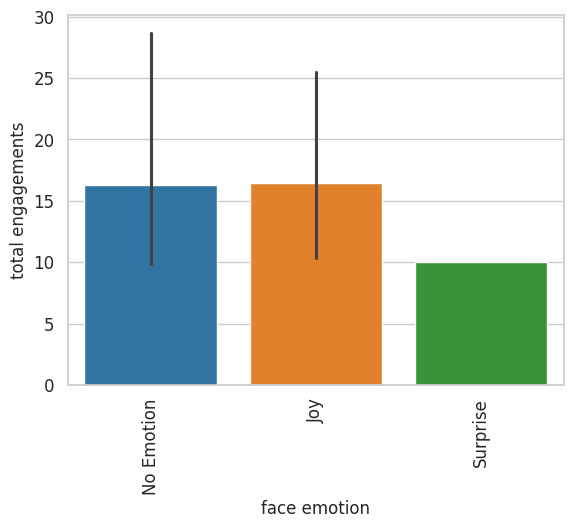

In [31]:
# Face Emotion Vs Engagements
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create a bar plot with enhanced style and medium figure size
sns.barplot(x = 'face emotion', y = 'total engagements', data = df, palette=sns.color_palette("tab10", len(df['engagement rate %'])))
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels by 45 degrees and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels font size

# Show the plot
plt.show()


### Analysis:
- Moderate Correlation: The analysis shows that face emotion is moderately correlated with total engagement.
- Joyous Faces: Joyous faces tend to attract more views and engagements compared to other emotions, such as surprise.
### Recommendations:
- Use Joyful Images: Focus on using images with joyful expressions to increase engagement.
- A/B Testing: Conduct A/B testing with different face emotions to further refine the most effective types of facial expressions.
- Regular Analysis: Analyze engagement patterns regularly to stay updated with audience preferences and trends.
- Content Context: Ensure that the context and content of the images align with the overall message and branding strategy.

### Number Of Persons VS Total Engagement and its Rate

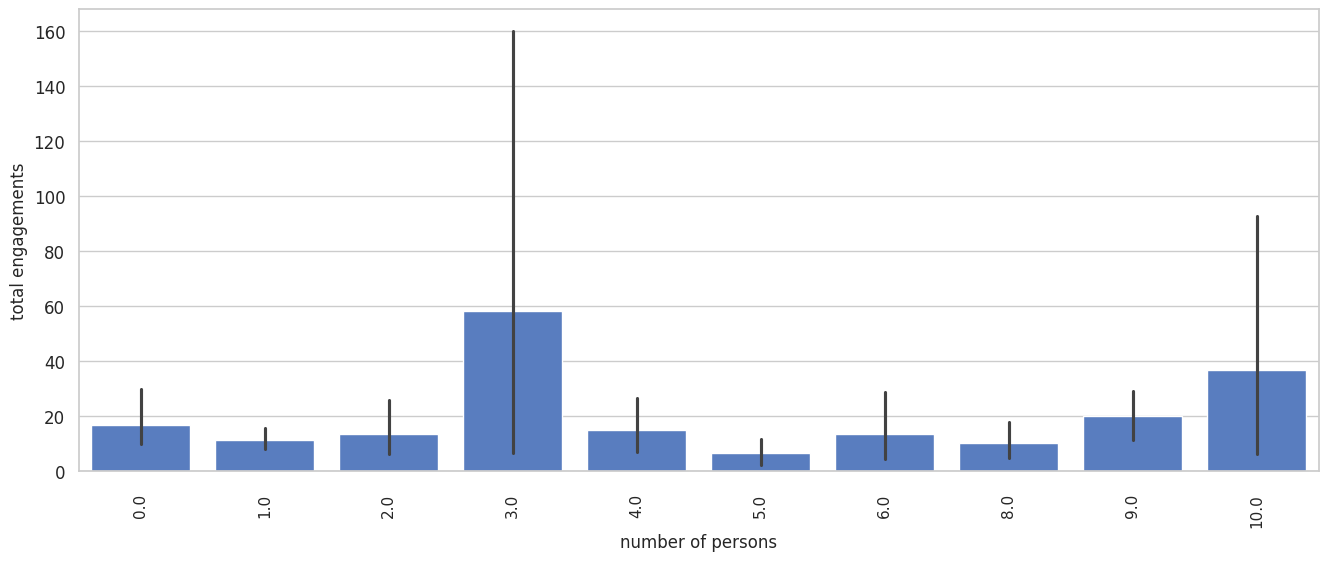

In [32]:
#Number of Persons VS Engagement Rate
plt.figure(figsize=(16, 6))
sns.barplot(x = 'number of persons', y = 'total engagements', data = df)
plt.xticks(rotation=90, fontsize=11)  # Rotate x-axis labels by 45 degrees and adjust font size
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_tick_params(pad=10)  # Adjust the value of 'pad' as needed

plt.show()

### Analysis
- From Analysis it appears that the number of persons in the images has a weak correlation with total engagement. This suggests that simply increasing the number of people in an image does not significantly boost engagement metrics such as likes, comments, and shares. Instead, other factors may be more influential in driving engagement.

### Recommendations

- Focus on Image Subject:
Instead of increasing the number of persons in an image, pay attention to the subject matter of the image. Ensure that the subject is relevant, interesting, and aligns with your audience’s interests.

- Enhance Image Quality:
 High-quality, visually appealing images tend to attract more engagement. Invest in good photography or design to make your images stand out.

- Use Compelling Captions:
Captions can significantly influence engagement. Use compelling, thought-provoking, or humorous captions to engage your audience.

- Optimize Timing:
Post images at times when your audience is most active. Use insights from your social media analytics to determine the best times to post.
  
- Leverage Hashtags:
Use relevant and trending hashtags to increase the visibility of your posts. This can help attract a wider audience and boost engagement.

- Encourage Interaction:
Prompt your audience to interact with your posts by asking questions, running polls, or encouraging them to tag friends.

- Consistent Branding:
Maintain a consistent brand aesthetic across all your posts. This helps in building brand recognition and loyalty.

